# **Crop Disease Detection System**
To resolve the detection diseases of in plants. CNN deep-learning models are popular for image processing. However, deep CNN layers are difficult to train as this process is computationally expensive. To solve such issues, transfer learning based models have been proposed by various researchers. Popular transfer learning models
include VGG-16, ResNet, DenseNet, and Inception. Among these models, we choose VGG-16. Making it suitable for plant disease detection tasks. By using the capabilities of
VGG-16 we can develop an efficient system for plant disease detection.

### **Importing all the necessary Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Data Collection**
The dataset utilized for this project is taken from Kaggle repository: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset. This dataset consists of about **87K rgb** images of healthy and diseased crop leaves which is categorized into **38 different classes**. The total dataset is divided into **80/20 ratio of training and validation** set preserving the directory structure. A new directory containing **33 test images** is created later for prediction purpose.

## **2. Data Pre-processing**
The dataset undergoes pre-processing steps to ensure its suitability for training crop disease
detection model. All images in the dataset are resized to a consistent dimension of 224, 224.

### **2.1 Training Images Loading and Preprocessing**

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### **2.2 Validation Images Loading and Preprocessing**

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## **3. VGG-16 Architecture**
The **VGG16** architecture is a deep convolutional neural network (CNN) designed for image
classification tasks. It was introduced by the Visual Geometry Group at the University of
Oxford. VGG-16 is characterized by its simplicity and uniform architecture, making it easy to
understand and implement.
The VGG-16 configuration typically consists of 16 layers, including 13 convolutional layers and
3 fully connected layers. These layers are organized into blocks, with each block containing
multiple convolutional layers followed by a max-pooling layer for downsampling.

### **3.1 Creating VGG-16 Base Model**

In [5]:
# Create the base model from the pre-trained model VGG16
base_model = VGG16( weights='imagenet', include_top=False, input_shape=(224, 224, 3) )
base_model.trainable = False # Freeze the base model

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### **3.2 Adding Custom layers**
Adding flatten layer and dense layers to the base model

In [12]:
# Create the new layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Global average pooling instead of Flatten

# Dense Layers
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)  
x = layers.Dropout(0.4)(x) #To avoid overfitting
predictions = layers.Dense(38, activation='softmax')(x)

# Combine the base model and the new layers
model = models.Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 15,784,294 (60.21 MB)

 Trainable params: 1,069,606 (4.08 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### **3.3 VGG-16 Model Training Phase**

In [14]:
# Train the model
history = model.fit(
    training_set,
    steps_per_epoch=None,
    epochs=5,
    validation_data=validation_set,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True
    )

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 28522s 13s/step - accuracy: 0.7752 - loss: 0.8254 - val_accuracy: 0.9229 - val_loss: 0.2376 - learning_rate: 0.0010
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 25873s 12s/step - accuracy: 0.9302 - loss: 0.2226 - val_accuracy: 0.9320 - val_loss: 0.2222 - learning_rate: 0.0010
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 26464s 12s/step - accuracy: 0.9489 - loss: 0.1665 - val_accuracy: 0.9483 - val_loss: 0.1653 - learning_rate: 0.0010
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 33946s 15s/step - accuracy: 0.9578 - loss: 0.1390 - val_accuracy: 0.9519 - val_loss: 0.1707 - learning_rate: 0.0010
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 27677s 13s/step - accuracy: 0.9635 - loss: 0.1227 - val_accuracy: 0.9478 - val_loss: 0.2089 - learning_rate: 0.0010


### **3.4 Evaluating Model**

In [19]:
#Training set Loss
train_loss, train_acc = model.evaluate(training_set)
print('Training Loss:', train_loss)

#Validation set Loss
val_loss, val_acc = model.evaluate(validation_set)
print('Validation Loss:', val_loss)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 25610s 12s/step - accuracy: 0.9651 - loss: 0.1228
Training Loss: 0.11635754257440567
550/550 ━━━━━━━━━━━━━━━━━━━━ 7227s 13s/step - accuracy: 0.9489 - loss: 0.2071
Validation Loss: 0.2088886946439743


In [63]:
#Training set Accuracy
print('Training Accuracy:', train_acc)

#Validation set Accuracy
print('Validation Accuracy:', val_acc)

Training Accuracy: 0.9670531153678894
Validation Accuracy: 0.9477577805519104


##### **Training History**

In [21]:
train_hist = history
print(train_hist.history.keys())
print(train_hist.history) #Return Dictionary of history

#Recording History in json
with open('training_hist.json','w') as f:
  json.dump(train_hist.history,f)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])
{'accuracy': [0.8636460900306702, 0.9353581070899963, 0.9491286873817444, 0.9571520090103149, 0.9625862240791321], 'loss': [0.4526968002319336, 0.20898912847042084, 0.1655655801296234, 0.14024658501148224, 0.12295133620500565], 'val_accuracy': [0.9229456186294556, 0.9319940805435181, 0.9483268857002258, 0.9518552422523499, 0.9477577805519104], 'val_loss': [0.23760037124156952, 0.2222372442483902, 0.16529256105422974, 0.17068646848201752, 0.2088887095451355], 'learning_rate': [0.0010000000474974513, 0.0010000000474974513, 0.0010000000474974513, 0.0010000000474974513, 0.0010000000474974513]}


##### **Saving Model**

In [66]:
# Save the model in .keras format
model.save('model_VGG16.keras')

### **3.5 Training and Validation Loss/Accuracy**
The loss function is primarily used to evaluate the model’s efficacy. The loss function calculates
the amount of variation between the actual and predicted values.

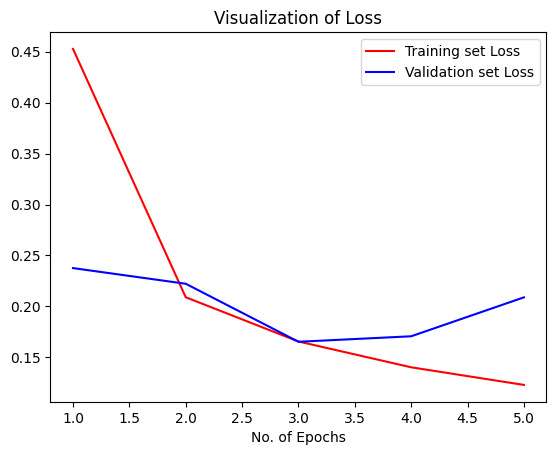

In [36]:
# Plotting the Loss
epochs = [i for i in range(1,6)]
plt.plot(epochs,train_hist.history['loss'],color='red',label='Training set Loss')
plt.plot(epochs,train_hist.history['val_loss'],color='blue',label='Validation set Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss')
plt.legend()
plt.show()

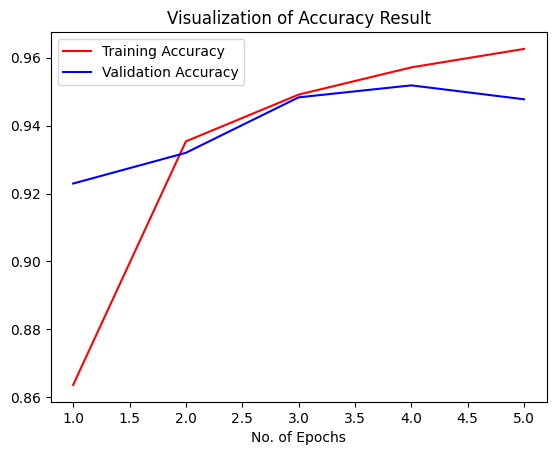

In [27]:
# Plotting the Accuracy
epochs = [i for i in range(1,6)]
plt.plot(epochs,train_hist.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,train_hist.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## **5. Evaluation:**
The model is evaluated using various metrics which were such as accuracy, precision, recall, and
F1-score.

In [40]:
class_name = validation_set.class_names
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

predicted_categories = model.predict(test_set)
y_pred = tf.argmax(predicted_categories, axis=1)

true_categories = tf.concat([y for x, y in test_set], axis=0)
y_true = tf.argmax(true_categories, axis=1)

Found 17572 files belonging to 38 classes.
550/550 ━━━━━━━━━━━━━━━━━━━━ 10289s 19s/step


### **5.1 Accuracy**

In [45]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9477577964944229


### **5.2 Precision**

In [62]:
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.950586400473044


### **5.3 Recall**

In [61]:
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.9477577964944229


### **5.4 F1-score**

In [60]:
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.9474821886849873


### **5.5 Classification Report**

In [52]:
# Print classification report
report = classification_report(y_true, y_pred,target_names=class_name)
print("Classification Report:")
print(report)

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.87      0.90       504
                                 Apple___Black_rot       0.97      0.96      0.97       497
                          Apple___Cedar_apple_rust       1.00      0.85      0.92       440
                                   Apple___healthy       0.79      1.00      0.88       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.87      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight      

### **5.6 Confusion Matrix**

Confusion Matrix:


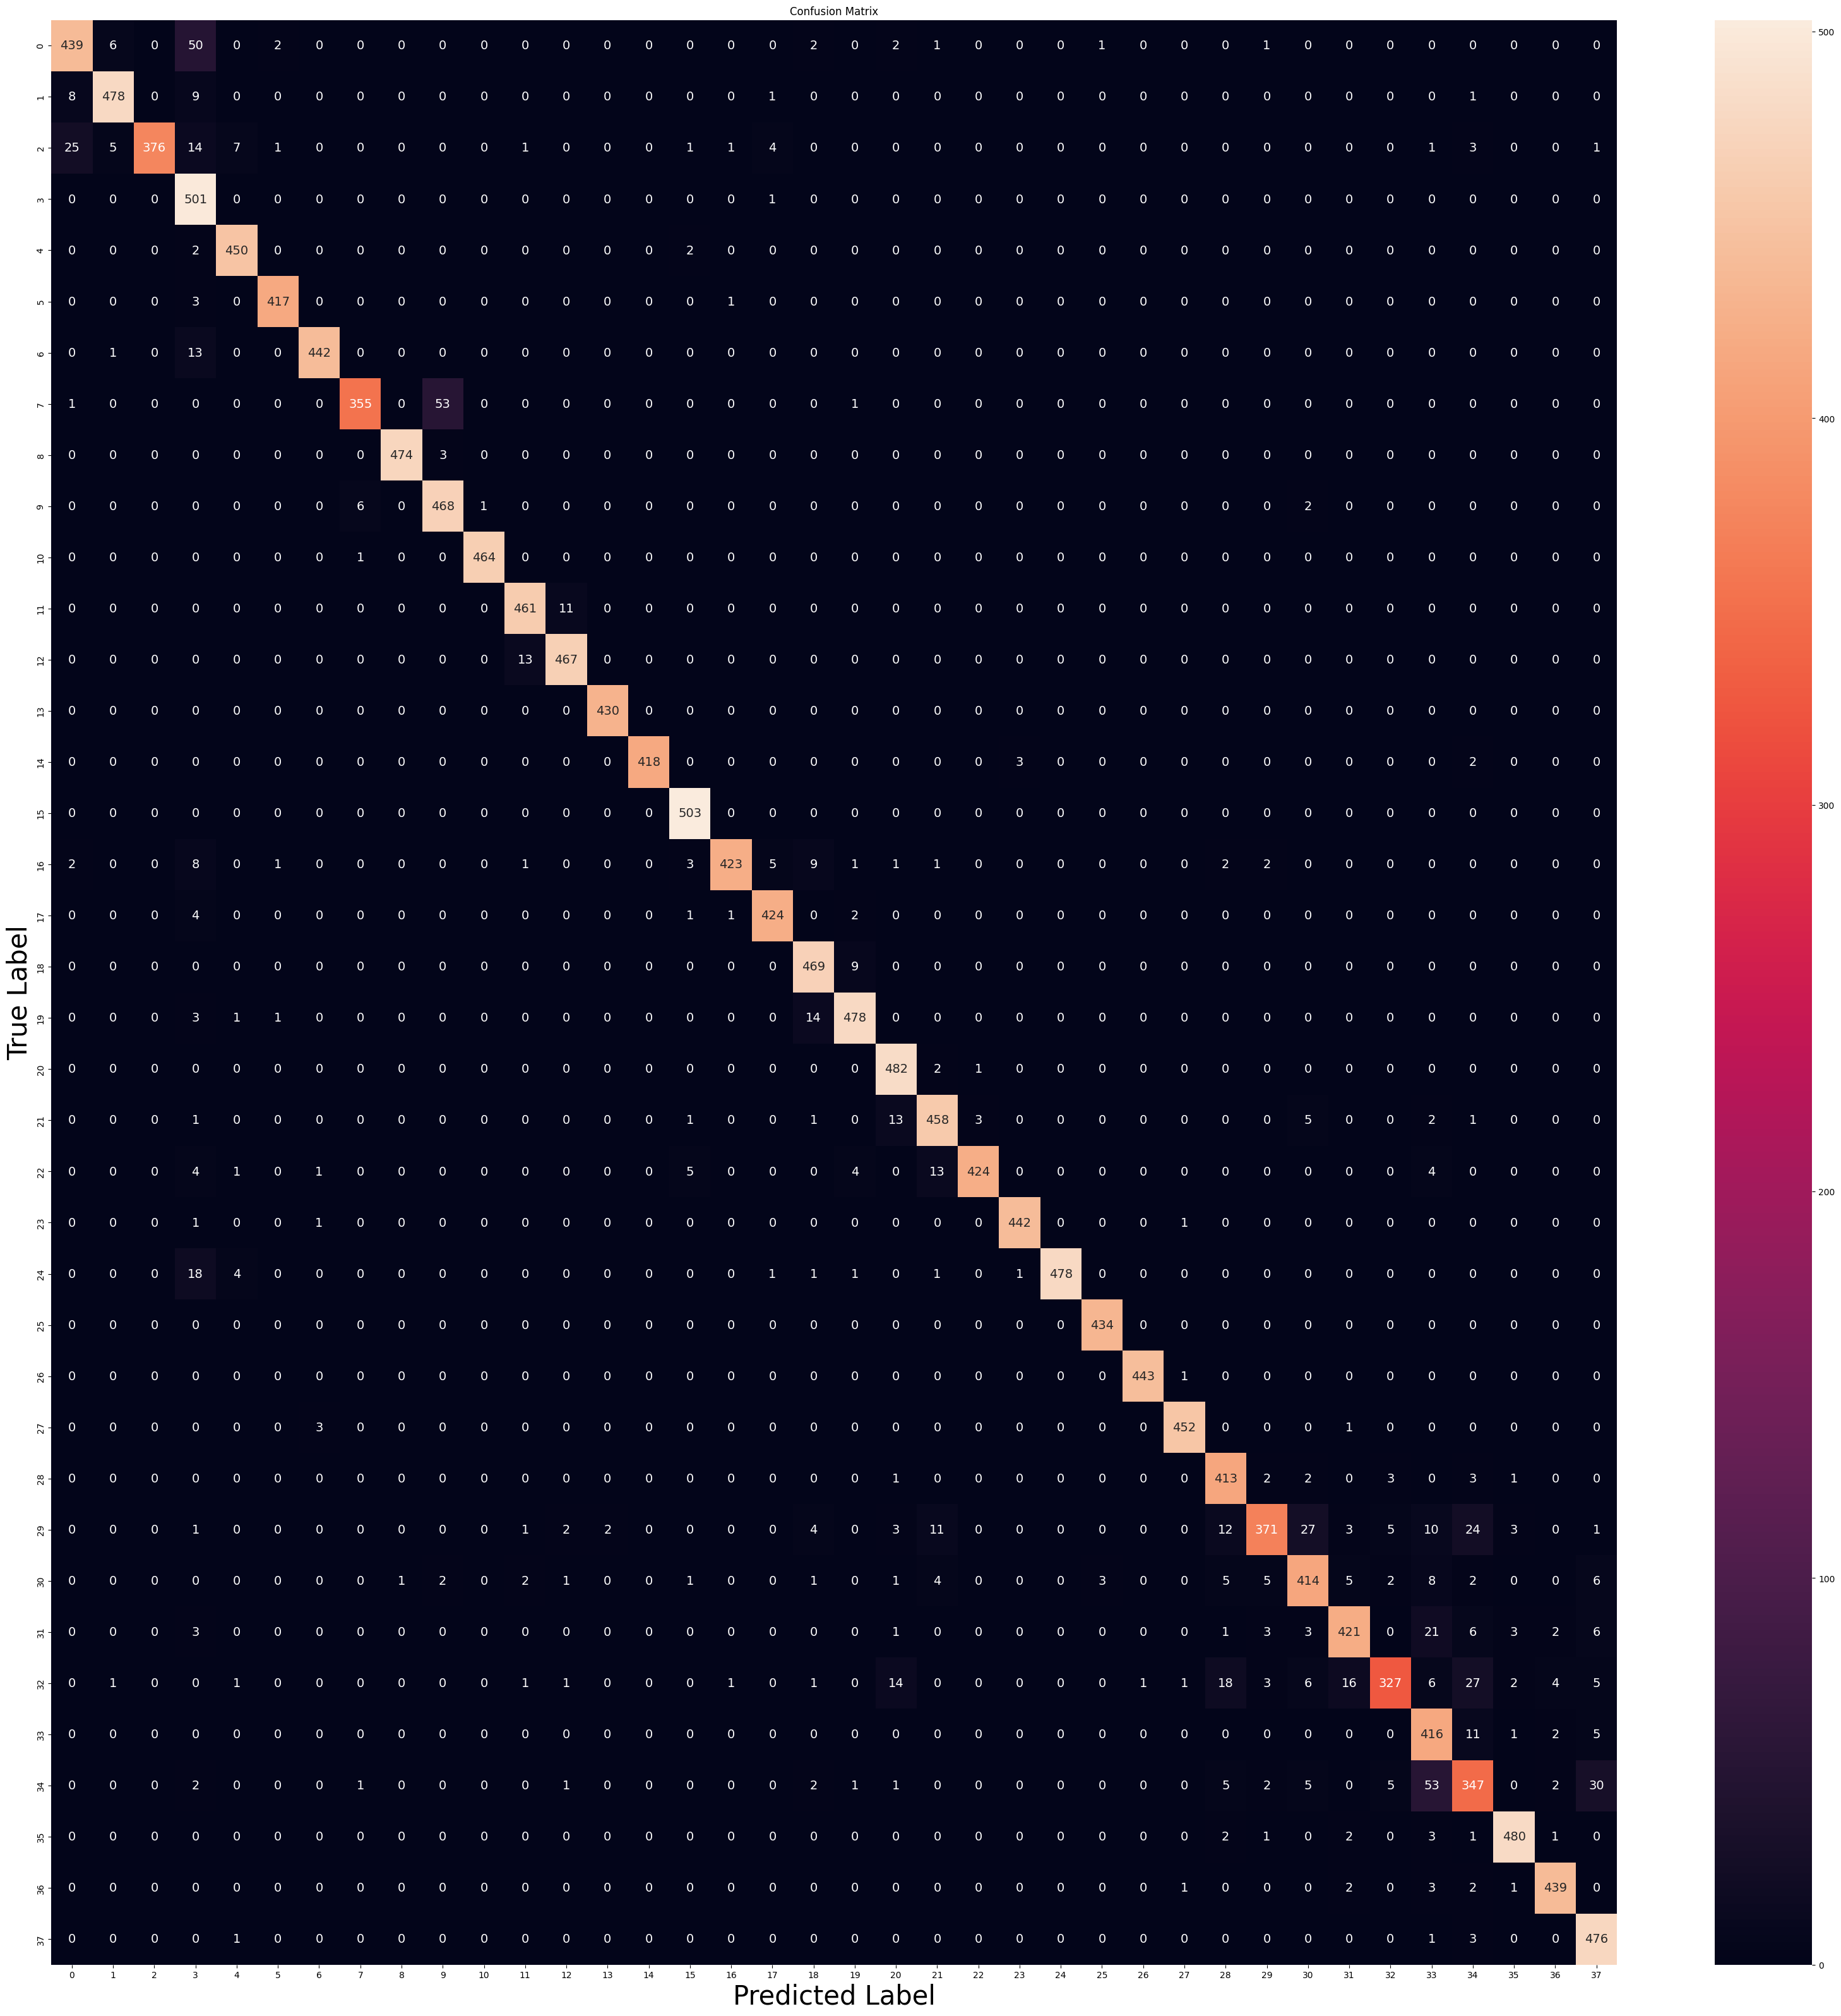

In [59]:
# Plot confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted Label', fontsize = 30)
plt.ylabel('True Label', fontsize = 30)
plt.title('Confusion Matrix')
plt.show()